<h1>Initialization with Same Weights </h1>


<h2>Table of Contents</h2>
<p>In this lab, we will see the problem of initializing the weights with the same value. We will see that even for a simple network, our model will not train properly.</p>

<ul>
    <li><a href="#Model">Neural Network Module and Training Function</a></li>
    <li><a href="#Makeup_Data">Make Some Data</a></li>
    <li><a href="#Train">Define the Neural Network with Same Weights Initialization, define  Criterion Function, Optimizer, and Train the Model</a></li>
</ul>

<h2>Preparation</h2>


We'll need the following libraries


In [4]:
import torch 
import torch.nn as nn
from torch import sigmoid
import matplotlib.pylab as plt
import numpy as np

torch.manual_seed(0)

Used for plotting the model


In [5]:
def plot(X, Y, model, epoch, leg=True):
    plt.plot(X.numpy(), model(X).detach().numpy(), label=('epoch ' + str(epoch)))
    plt.plot(X.numpy(), Y.numpy(), 'r')
    plt.xlabel('x')

    if leg == True:
        plt.legend()
    else:
        pass

<a name="Model"><h2 id="Model">Neural Network Module and Training Function</h2></a>


Define the activations and the output of the first linear layer as an attribute. Note that this is not good practice. 


In [6]:
class Net(nn.Module):
    def __init__(self, D_in, H, D_out):
        super(Net, self).__init__()
        self.linear1 = nn.Linear(D_in, H)
        self.linear2 = nn.Linear(H, D_out)
        self.a1 = None
        self.l1 = None
        self.l2=None
    
    def forward(self, x):
        self.l1 = self.linear1(x)
        self.a1 = sigmoid(self.l1)
        self.l2 = self.linear2(self.a1)
        yhat = sigmoid(self.linear2(self.a1))
        return yhat

Define the training function:


In [7]:
def train(Y, X, model, optimizer, criterion, epochs=1000):
    cost = []
    total = 0

    for epoch in range(epochs):
        total = 0

        for y, x in zip(Y, X):
            yhat = model(x)
            loss = criterion(yhat, y)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
            total += loss.item() 
        
        cost.append(total)
        
        if epoch % 300 == 0:    
            plot(X, Y, model, epoch, leg=True)
            plt.show()
            model(X)
            plt.scatter(model.a1.detach().numpy()[:, 0], model.a1.detach().numpy()[:, 1], c=Y.numpy().reshape(-1))
            plt.title('activations')
            plt.show()
    
    return cost

<a name="Makeup_Data"><h2 id="Makeup_Data">Make Some Data</h2></a>


In [8]:
X = torch.arange(-20, 20, 1).view(-1, 1).type(torch.FloatTensor)
Y = torch.zeros(X.shape[0])
Y[(X[:, 0] > -4) & (X[:, 0] < 4)] = 1.0

<a name="Train"><h2 id="Train">Define the Neural Network with Same Weights Initialization, define Criterion Function, Optimizer and Train the Model</h2></a>


Create the Cross-Entropy loss function: 


In [9]:
def criterion_cross(outputs, labels):
    out = -1 * torch.mean(labels * torch.log(outputs) + (1 - labels) * torch.log(1 - outputs))
    return out

Define the Neural Network


In [10]:
D_in = 1
H = 2
D_out = 1
learning_rate = 0.1
model = Net(D_in, H, D_out)

This is the PyTorch default installation


In [11]:
model.state_dict()

OrderedDict([('linear1.weight',
              tensor([[-0.0075],
                      [ 0.5364]])),
             ('linear1.bias', tensor([-0.8230, -0.7359])),
             ('linear2.weight', tensor([[-0.2723,  0.1896]])),
             ('linear2.bias', tensor([-0.0140]))])

Same Weights Initialization with all ones for weights and zeros for the bias.


In [12]:
model.state_dict()['linear1.weight'][0] = 1.0
model.state_dict()['linear1.weight'][1] = 1.0
model.state_dict()['linear1.bias'][0] = 0.0
model.state_dict()['linear1.bias'][1] = 0.0
model.state_dict()['linear2.weight'][0] = 1.0
model.state_dict()['linear2.bias'][0] = 0.0
model.state_dict()

OrderedDict([('linear1.weight',
              tensor([[1.],
                      [1.]])),
             ('linear1.bias', tensor([0., 0.])),
             ('linear2.weight', tensor([[1., 1.]])),
             ('linear2.bias', tensor([0.]))])

Optimizer, and Train the Model:


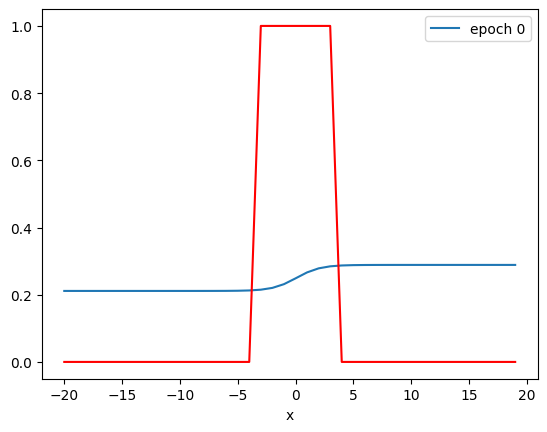

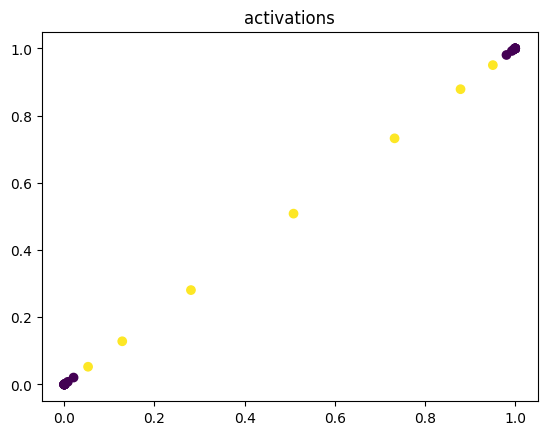

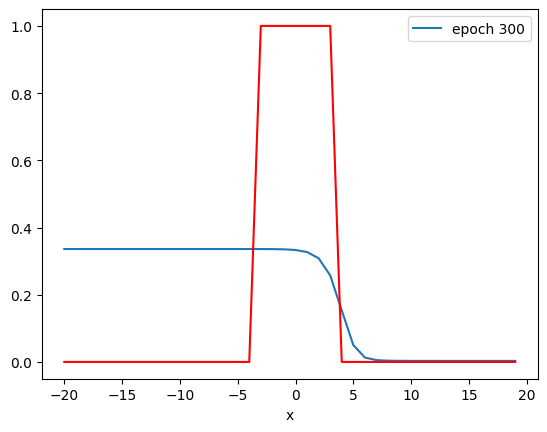

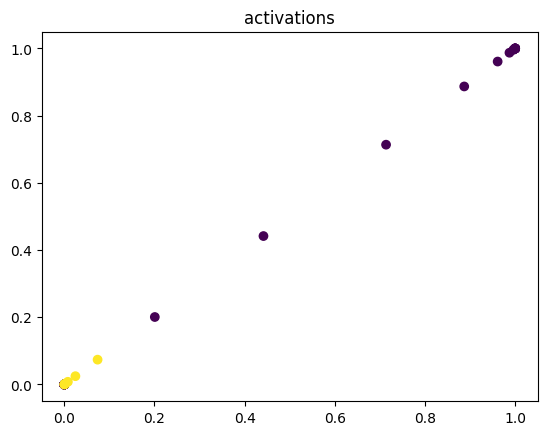

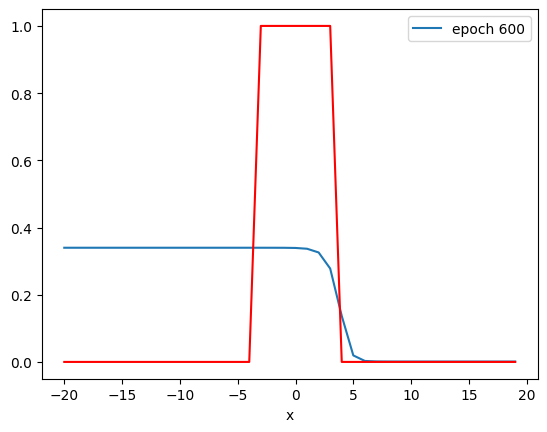

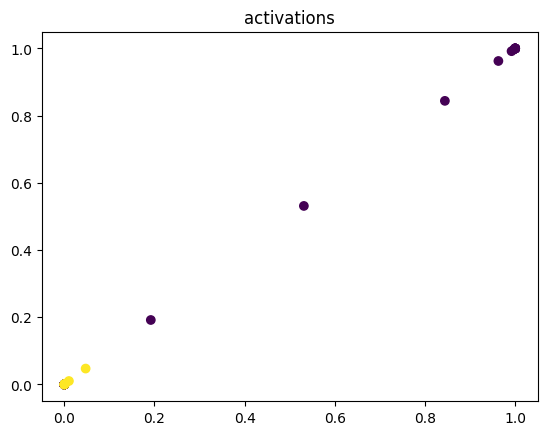

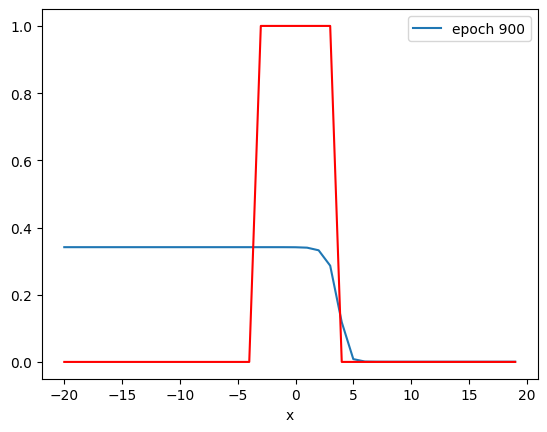

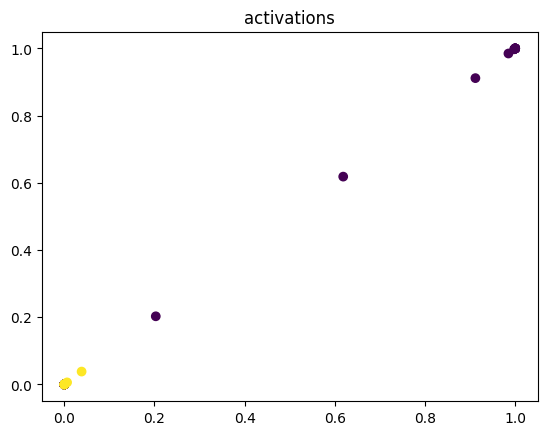

Text(0.5, 1.0, 'cross entropy loss')

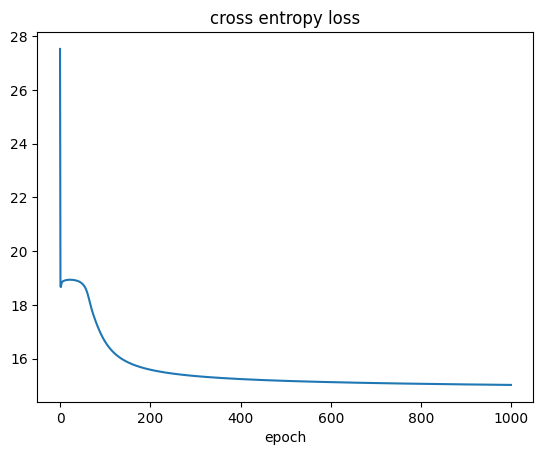

In [13]:
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
cost_cross = train(Y, X, model, optimizer, criterion_cross, epochs=1000)

plt.plot(cost_cross)
plt.xlabel('epoch')
plt.title('cross entropy loss')

By examining the output of the  paramters all thought they have changed they are identical.


In [14]:
model.state_dict()

OrderedDict([('linear1.weight',
              tensor([[1.9340],
                      [1.9340]])),
             ('linear1.bias', tensor([-9.0725, -9.0725])),
             ('linear2.weight', tensor([[-3.3976, -3.3976]])),
             ('linear2.bias', tensor([-0.6546]))])

In [15]:
yhat = model(torch.tensor([[-2.0],[0.0],[2.0]]))
yhat

tensor([[0.3420],
        [0.3418],
        [0.3337]], grad_fn=<SigmoidBackward0>)

<h2 id="Train2">Define the Neural Network, Criterion Function, Optimizer and Train the Model </h2>


In [16]:
D_in = 1
H = 2
D_out = 1
learning_rate = 0.1
model = Net(D_in, H, D_out)

Repeat the previous steps above by using the MSE cost or total loss: 


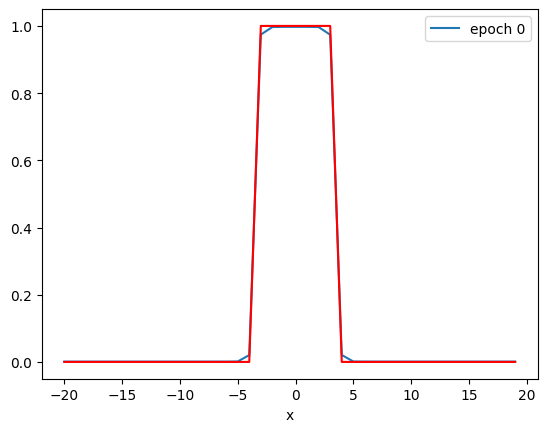

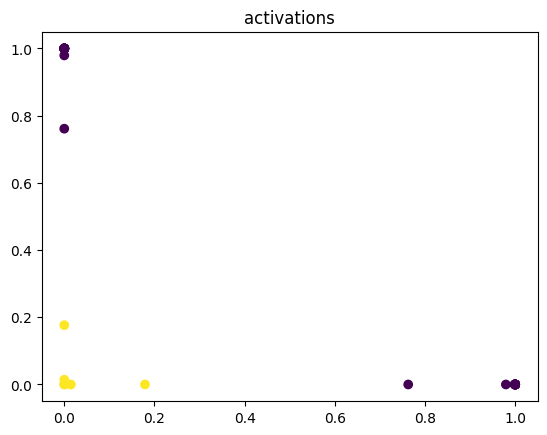

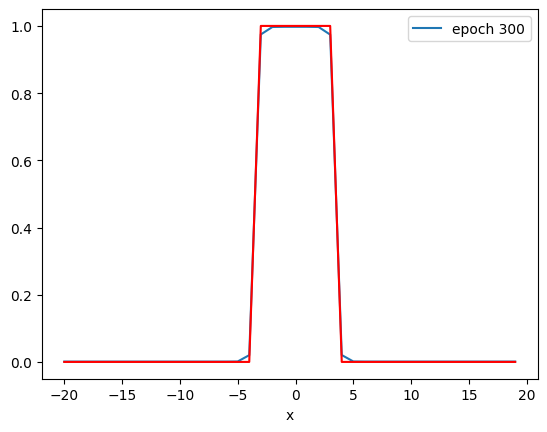

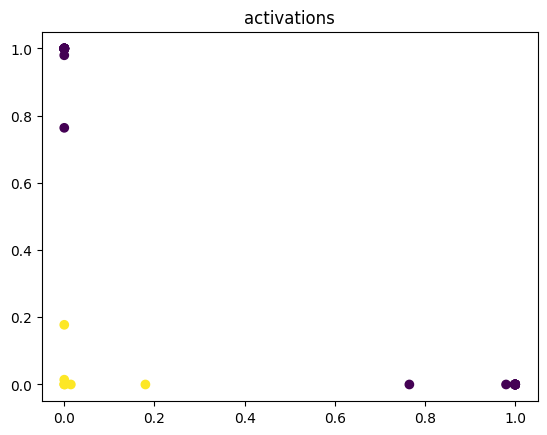

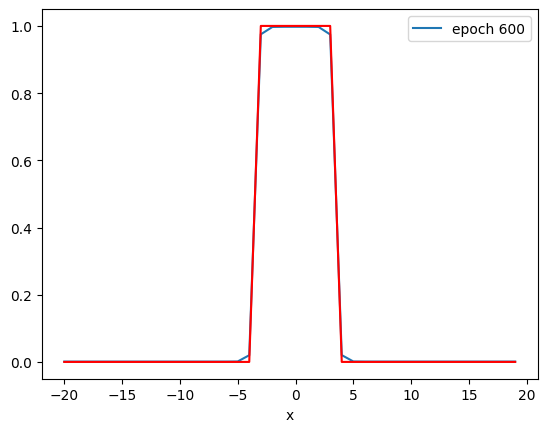

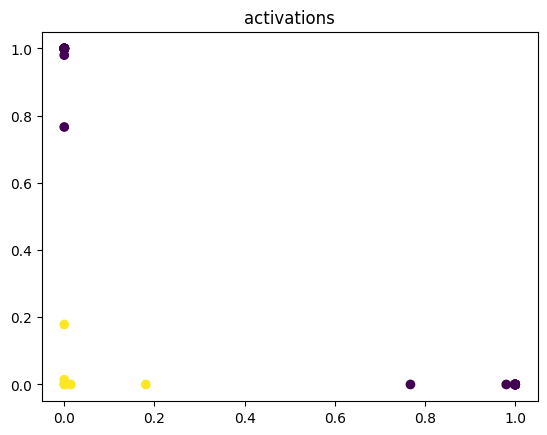

In [ ]:
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
criterion = torch.nn.MSELoss()
cost_cross = train(Y, X, model, optimizer, criterion, epochs=1000)

plt.plot(cost_cross)
plt.xlabel('epoch')
plt.title('MSE loss')